<a href="https://colab.research.google.com/github/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_09_4_transfer_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 9 Material

* Part 9.1: Introduction to Keras Transfer Learning [[Video]](https://www.youtube.com/watch?v=WLlP6S-Z8Xs&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_1_keras_transfer.ipynb)
* Part 9.2: Popular Pretrained Neural Networks for Keras [[Video]](https://www.youtube.com/watch?v=ctVA1_46YEE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_2_popular_transfer.ipynb)
* Part 9.3: Transfer Learning for Computer Vision and Keras [[Video]](https://www.youtube.com/watch?v=61vMUm_XBMI&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_3_transfer_cv.ipynb)
* **Part 9.4: Transfer Learning for Languages and Keras** [[Video]](https://www.youtube.com/watch?v=ajmAAg9FxXA&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_4_transfer_nlp.ipynb)
* Part 9.5: Transfer Learning for Keras Feature Engineering [[Video]](https://www.youtube.com/watch?v=Dttxsm8zpL8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_09_5_transfer_feature_eng.ipynb)

# Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [1]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 9.4: Transfer Learning for Languages and Keras

Transfer learning is commonly used with Natural Language Processing (NLP).  This course has an entire module that covers NLP.  However, for now we will look how a NLP network can be loaded into Keras for transfer learning.  The following three sources were helpful for the creation of this section.

* Cer, D., Yang, Y., Kong, S. Y., Hua, N., Limtiaco, N., John, R. S., ... & Sung, Y. H. (2018). [Universal sentence encoder](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175.
* [Deep Transfer Learning for Natural Language Processing: Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial: How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to easily be loaded into TensorFlow.  To install TensorHub use the following command.

In [2]:
!pip install tensorflow_hub

  Using cached https://files.pythonhosted.org/packages/00/0e/a91780d07592b1abf9c91344ce459472cc19db3b67fdf3a61dca6ebb2f5c/tensorflow_hub-0.7.0-py2.py3-none-any.whl


It is also necessary to install TensorFlow Datasets.  This can be done with the following command.

In [3]:
!pip install tensorflow_datasets

  Using cached https://files.pythonhosted.org/packages/8b/2e/77823b3754af2eb2ca6f3676f91741fafa44bc653cfafc267c70afd7355f/tensorflow_datasets-1.3.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/0c/afb81ea6998f6e26521671585d1cd9d3f7945a8b9834764e91757453dc25/tensorflow_metadata-0.15.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/cf/9c/fb5d48abfe5d791cd496e4242ebcf87a4bb2e0c3dcd6e0ae68c11426a528/promise-2.3.tar.gz
  Using cached https://files.pythonhosted.org/packages/c7/11/345f3173809cea7f1a193bfbf02403fff250a3360e0e118a1630985e547d/dill-0.3.1.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/eb/ee/e59e74ecac678a14d6abefb9054f0bbcb318a6452a30df3776f133886d7d/googleapis-common-protos-1.6.0.tar.gz
  Created wheel for promise: filename=promise-2.3-cp37-none-any.whl size=21500 sha256=45ca497494456f4971c99c6b3e5e4df9410bf5a2f634e93b02b6771ba9475c20
  Stored in directory: C:\Users\jheaton\AppData\Local\pip\Cache\wheels\

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH

Load the Internet Movie DataBase (IMDB) reviews data set.

In [4]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to C:\Users\jheaton\tensorflow_datasets\imdb_reviews\plain_text\0.1.0. Subsequent calls will reuse this data.


Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This was trained by Google on gnews data and can convert RAW text into vectors.  

In [5]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Consider the following 3 movie reviews.

In [6]:
train_examples[:3]

array([b"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a clich\xc3\xa9, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not

The embedding layer can convert each to 20-number vectors.

In [7]:
hub_layer(train_examples[:3])

<tf.Tensor: id=305, shape=(3, 20), dtype=float32, numpy=
array([[ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ],
       [ 3.4232912 , -4.230874  ,  4.1488533 , -0.29553518, -6.802391  ,
        -2.5163853 , -4.4002395 ,  1.905792  ,  4.7512794 , -0.40538004,
        -4.3401685 ,  1.0361497 ,  0.9744097 ,  0.71507156, -6.2657013 ,
         0.16533905,  4.560262  , -1.3106939 , -3.1121316 , -2.1338716 ],
       [ 3.8508697 , -5.003031  ,  4.8700504 , -0.04324996, -5.893603  ,
        -5.2983093 , -4.004676  ,  4.1236343 ,  6.267754  ,  0.11632943,
        -3.5934832 ,  0.8023905 ,  0.56146765,  0.9192484 , -7.3066816 ,
         2.8202746 ,  6.2000837 , -3.5709393 , -4.564525  , -2.305622  ]],
      dtype=float32)>

We add addition layers to attempt to classify the movie reviews as either positive or negative.

In [8]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


Compile the neural network.

In [9]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Split and train the neural network.

In [10]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 6s 379us/sample - loss: 0.6585 - accuracy: 0.6415 - val_loss: 0.6056 - val_accuracy: 0.6739
Epoch 2/40
15000/15000 [==============================] - 4s 272us/sample - loss: 0.5759 - accuracy: 0.7069 - val_loss: 0.5587 - val_accuracy: 0.7135
Epoch 3/40
15000/15000 [==============================] - 4s 266us/sample - loss: 0.5284 - accuracy: 0.7452 - val_loss: 0.5209 - val_accuracy: 0.7444
Epoch 4/40
15000/15000 [==============================] - 4s 267us/sample - loss: 0.4847 - accuracy: 0.7751 - val_loss: 0.4853 - val_accuracy: 0.7706oss: 0.4852 - accuracy: 0.77
Epoch 5/40
15000/15000 [==============================] - 4s 264us/sample - loss: 0.4425 - accuracy: 0.8038 - val_loss: 0.4547 - val_accuracy: 0.7879
Epoch 6/40
15000/15000 [==============================] - 4s 257us/sample - loss: 0.4033 - accuracy: 0.8279 - val_loss: 0.4214 - val_accuracy: 0.8090
Epoch 7/40
15000/15000

Evaluate the neural network.

In [12]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.433657779353857, 0.8548]


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

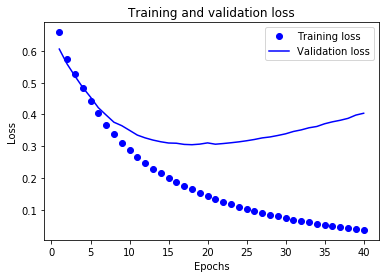

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

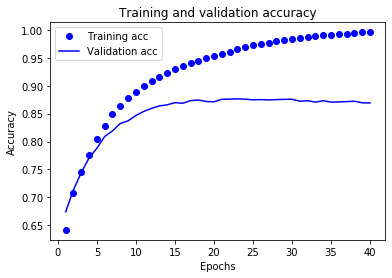

In [15]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()